In [4]:
import shap
from shap.datasets import iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# Load IRIS dataset
X, y = iris(display=True)

In [8]:
y = pd.Series(y)

In [9]:
# Split test train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print("The shape of training data", X_train.shape)
print("The shape of test data", X_test.shape)

The shape of training data (120, 4)
The shape of test data (30, 4)


In [10]:
# distribution of target in train and test
y_train.value_counts(normalize=True)

versicolor    0.333333
virginica     0.333333
setosa        0.333333
Name: proportion, dtype: float64

In [11]:
y_test.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [25]:
# encode the target
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

le.classes_

array([0, 1, 2])

In [26]:
y_test

array([0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 1,
       1, 2, 2, 1, 0, 0, 1, 2])

In [27]:
# fit model on data

rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=10)

rf.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
# predictions on data

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [29]:

# accuracy scores

print("The training accuracy is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy is ", accuracy_score(y_test, y_pred_test))

The training accuracy is  0.9916666666666667
The test accuracy is  0.9666666666666667


In [34]:
# make an explainer
# by default data is taking first 100 values
explainer = shap.TreeExplainer(model=rf, data=X_train, model_output='probability')

In [35]:
# Base value - Average prediction using base data

explainer.expected_value

array([0.318     , 0.31737229, 0.36462771])

In [36]:
# calculate base values manually - just to cross check
rf.predict_proba(X_train).mean(axis=0)

array([0.33166667, 0.32906746, 0.33926587])

In [38]:
# Generate Shap values
shap_values = explainer(X_test, y_test)
shap_values

.values =
array([[[ 9.59166677e-02, -2.96915602e-02, -6.62251115e-02],
        [ 6.08333341e-03, -3.34523807e-03, -2.73809538e-03],
        [ 2.52416671e-01, -8.33582264e-02, -1.69058445e-01],
        [ 3.27583338e-01, -2.00977276e-01, -1.26606063e-01]],

       [[-2.50833334e-02,  5.84783542e-02, -3.33950239e-02],
        [-2.08333340e-03,  4.61904758e-03, -2.53571432e-03],
        [-1.27916669e-01,  3.94961046e-01, -2.67044375e-01],
        [-1.62916669e-01,  2.15478359e-01, -5.25616897e-02]],

       [[-3.75000003e-02,  3.14047624e-02,  6.09523841e-03],
        [-5.83333347e-03,  1.50476192e-02, -9.21428598e-03],
        [-1.11833335e-01,  3.62335503e-01, -2.50502169e-01],
        [-1.62833336e-01,  2.73839831e-01, -1.11006495e-01]],

       [[-1.75000006e-03,  4.17023821e-02, -3.99523834e-02],
        [ 6.17500011e-02, -6.70357155e-02,  5.28571418e-03],
        [ 2.49583337e-01, -8.02932910e-02, -1.69290046e-01],
        [ 3.72416672e-01, -2.11745675e-01, -1.60670999e-01]],

      

In [42]:
test_case = X_test.iloc[0:1,:]

test_case

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
40,5.0,3.5,1.3,0.3


In [43]:
prediction = rf.predict(test_case)
prediction_probe = rf.predict_proba(test_case)

prediction, le.inverse_transform(prediction)

(array([0]), array([0]))

In [44]:
# calculate the shapley values

shap_values = explainer(X_test.iloc[0:1,:])

In [ ]:

shap_values.shape

# Explain the output shape
# 1 - no of testcase
# 4 - Number of features
# 3 - number of classes in y

(1, 4, 3)

In [46]:

shap_values

.values =
array([[[ 0.09591667, -0.02969156, -0.06622511],
        [ 0.00608333, -0.00334524, -0.0027381 ],
        [ 0.25241667, -0.08335823, -0.16905844],
        [ 0.32758334, -0.20097728, -0.12660606]]])

.base_values =
array([[0.318     , 0.31737229, 0.36462771]])

.data =
array([[5. , 3.5, 1.3, 0.3]])

In [47]:

shap_values.base_values, explainer.expected_value

(array([[0.318     , 0.31737229, 0.36462771]]),
 array([0.318     , 0.31737229, 0.36462771]))

In [48]:
shap_values.data, test_case

(array([[5. , 3.5, 1.3, 0.3]]),
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 40                5.0               3.5                1.3               0.3)

In [49]:
shap_values.shape, shap_values

((1, 4, 3),
 .values =
 array([[[ 0.09591667, -0.02969156, -0.06622511],
         [ 0.00608333, -0.00334524, -0.0027381 ],
         [ 0.25241667, -0.08335823, -0.16905844],
         [ 0.32758334, -0.20097728, -0.12660606]]])
 
 .base_values =
 array([[0.318     , 0.31737229, 0.36462771]])
 
 .data =
 array([[5. , 3.5, 1.3, 0.3]]))

In [ ]:
# for 0 class - setosa, for class 1 - virginia
shap_values[0,:,0], shap_values[0,:,1]

(.values =
 array([0.09591667, 0.00608333, 0.25241667, 0.32758334])
 
 .base_values =
 np.float64(0.31799999999999995)
 
 .data =
 array([5. , 3.5, 1.3, 0.3]),
 .values =
 array([-0.02969156, -0.00334524, -0.08335823, -0.20097728])
 
 .base_values =
 np.float64(0.31737229437229436)
 
 .data =
 array([5. , 3.5, 1.3, 0.3]))

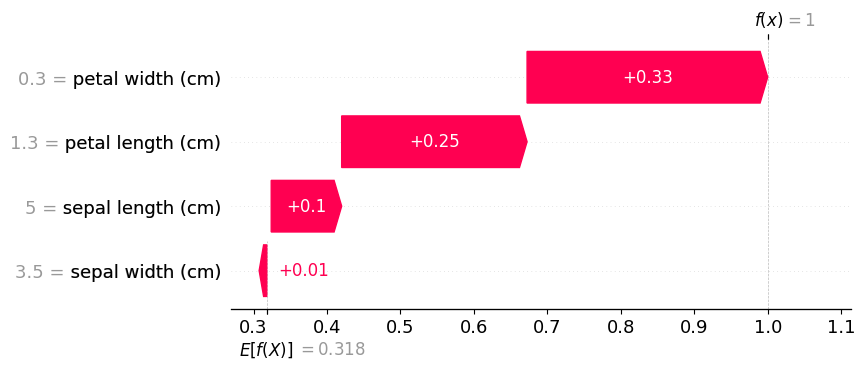

In [ ]:
# waterfall plot

shap.waterfall_plot(shap_values[0,:,0])

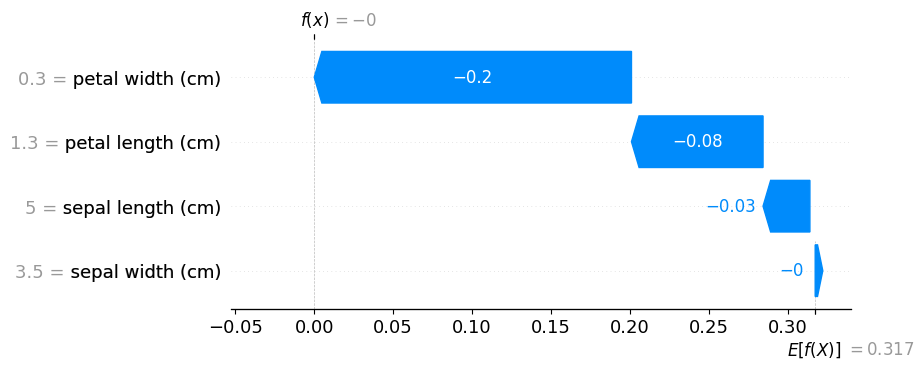

In [53]:
shap.waterfall_plot(shap_values[0,:,1])

In [55]:
# check additivity

shap_values[0,:,0].values.sum(), shap_values[0,:,1].values.sum()

(np.float64(0.6820000102091581), np.float64(-0.3173723003361374))

In [56]:
(shap_values[0,:,0].base_values + shap_values[0,:,0].values.sum()).round()

np.float64(1.0)

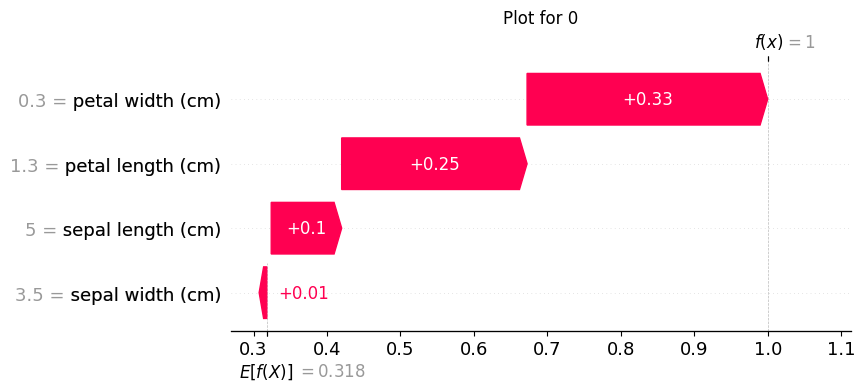

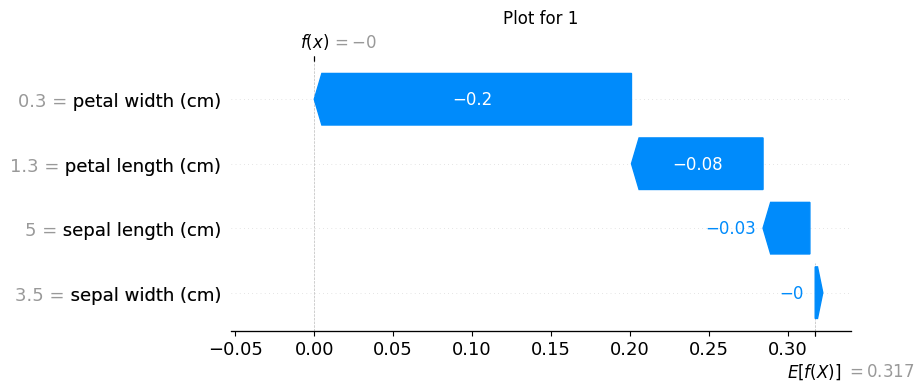

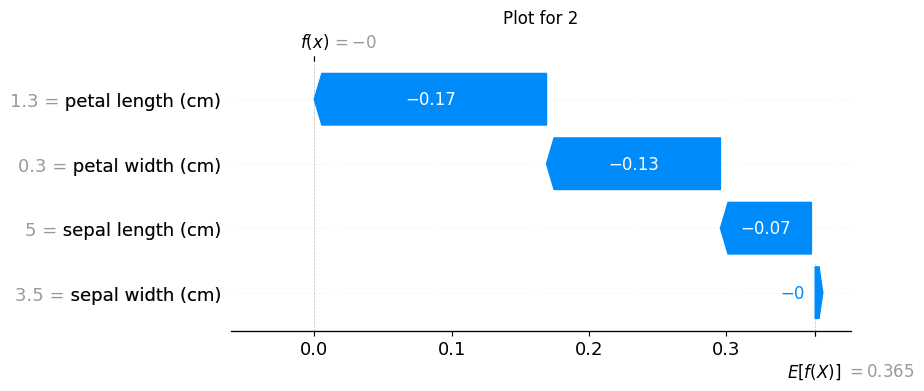

In [57]:
import matplotlib.pyplot as plt
for i in range(len(le.classes_)):
    plt.title(f"Plot for {le.classes_[i]}")
    shap.waterfall_plot(shap_values[0,:,i])
    print("\n\n")

In [58]:

shap_values[0,:,2].values.sum()

np.float64(-0.3646277147182263)

In [60]:
(shap_values[0,:,2].base_values +  shap_values[0,:,2].values.sum()).round()

np.float64(-0.0)